In [1]:

from config_LT import *
import Data.get_data_LT as _Data
import matplotlib.pyplot as plt
from torch.utils import data

config = set_config(jup_notebook=True, dataset='msra10k')
cfg_test = config.config_test

cfg_test.normalize = False
test_set = _Data.DAVIS_video_dataset(cfg_test, imset='test')

test_loader = data.DataLoader(test_set, batch_size=1, shuffle=False,
                                   num_workers=0, drop_last=cfg_test.drop_last, pin_memory=False)


print(config.dataset)

print(len(test_loader))

loader = iter(test_loader)
img, spx, obj_label, num_obj, info = next(loader)

try:    
    print('img: ', img.shape)
    print('obj_label: ', obj_label.shape)
    print('spx: ', spx.shape)
    print('num_obj: ', num_obj)
    print('info: ', info)    
except:
    print('loader failure')

msra10k
30
img:  torch.Size([1, 69, 3, 384, 384])
obj_label:  torch.Size([1, 69, 1, 384, 384])
spx:  torch.Size([1, 69, 1, 384, 384])
num_obj:  tensor([3])
info:  {'name': ['bike-packing'], 'num_frames': tensor([69]), 'orig_shape': [tensor([480]), tensor([910])]}


<IPython.core.display.Javascript object>


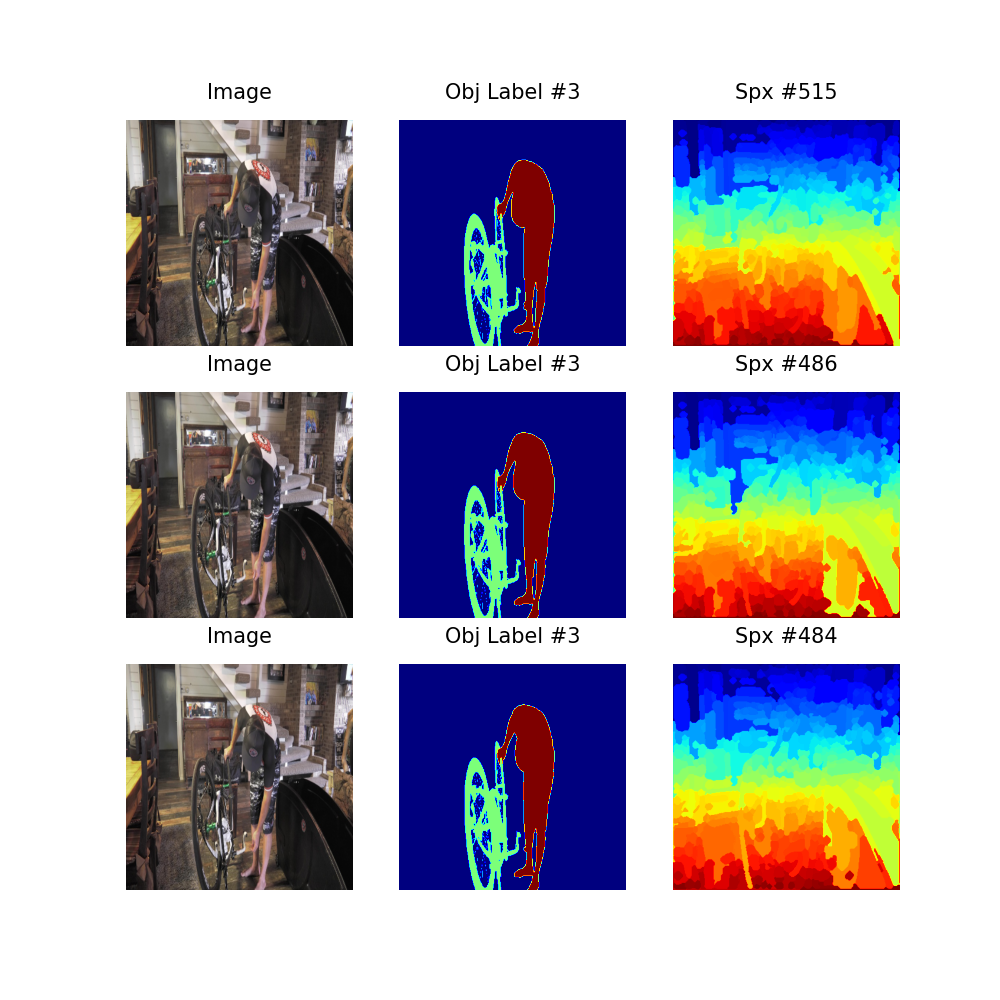

In [2]:
%matplotlib notebook
plt.rcParams['figure.dpi'] = 200    
plt.figure(num=1, figsize=(4, 4))
b = 0
for t in range(3):
    plt.subplot(3,3,3*t+1)
    plt.axis('off')
    plt.title('Image', fontsize=6)
    plt.imshow(img[b,t].permute(1,2,0), cmap='brg')
    plt.subplot(3,3,3*t+2)
    plt.axis('off')
    plt.title('Obj Label #{}'.format(obj_label[b, t, 0].max().int()), fontsize=6)
    plt.imshow(obj_label[b, t, 0], cmap='jet')
    plt.subplot(3,3,3*t+3)
    plt.axis('off')
    plt.title('Spx #{}'.format(spx[b, t, 0].max().int()), fontsize=6)
    plt.imshow(spx[b,t,0], cmap='jet')
print()